In [38]:
import random
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import scipy.io as sio #loadmat

#### Data

In [39]:
mat_contents = sio.loadmat("digits.mat")
mat_contents

{'__header__': b'MATLAB 5.0 MAT-file, Platform: GLNXA64, Created on: Sun Oct 16 13:09:09 2011',
 '__version__': '1.0',
 '__globals__': [],
 'X': array([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]),
 'y': array([[10],
        [10],
        [10],
        ...,
        [ 9],
        [ 9],
        [ 9]], dtype=uint8)}

In [40]:
x = np.array(mat_contents['X'])
y = np.array(mat_contents['y'])
print(f'x values:{x}')
print(f'y values:{y}')

x values:[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
y values:[[10]
 [10]
 [10]
 ...
 [ 9]
 [ 9]
 [ 9]]


In [41]:
mat_contents = sio.loadmat("digits.mat")
print(f"Y shape: {y.shape}")
print(f"X shape: {x.shape}. X[0] shape:{x[0].shape}")

Y shape: (5000, 1)
X shape: (5000, 400). X[0] shape:(400,)


#### Data visualization

In [42]:
# x= x.reshape(5000, 20, 20)
# x.shape[0]

In [43]:
def displayData():
    img_vectors = np.array(x.reshape(5000, 20, 20))
    img =img_vectors[1500]
    img = np.transpose(img)
    plt.imshow(img)
   

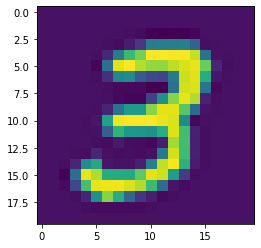

In [44]:
displayData()

In [45]:
labels = np.array([10,  1,  2,  3,  4,  5,  6,  7,  8,  9])

In [46]:
X = np.c_[np.ones((x.shape[0], 1)), x]
X

array([[1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.]])

In [47]:
def hypothesis(theta, X):
    return 1 / (1 + np.exp(-(np.dot(theta, X.T)))) - 0.0000001

In [48]:
def cost(X, y, theta):
    y1 = hypothesis(X, theta)
    return -(1/len(X)) * np.sum(y*np.log(y1) + (1-y)*np.log(1-y1))

In [49]:
y1 = np.zeros([x.shape[0], len(labels)])
y1 = pd.DataFrame(y1)

In [50]:
for i in range(0, len(labels)):
    for j in range(0, len(y1)):
        if y[j] == labels[i]:
            y1.iloc[j, i] = 1
        else: 
            y1.iloc[j, i] = 0
y1.head()

,0,1,2,3,4,5,6,7,8,9
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [54]:
X.shape

(5000, 401)

In [55]:
def gradient_descent(X, y, theta, alpha, epochs):
    m = len(X)
    #cost = [[] for i in range(10)]
    for i in range(0, epochs):
        for j in range(0, 10):
            theta = pd.DataFrame(theta)
            h = hypothesis(theta.iloc[:,j], X)
            for k in range(0, theta.shape[0]):
                theta.iloc[k, j] -= (alpha/m) * np.sum((h-y.iloc[:, j])*X[:, k])
            theta = pd.DataFrame(theta)
            #c =cost(X, y.iloc[:, j], theta.iloc[:,j])
            #cost[j].append(c)
    return theta        

In [58]:
theta.head()

AttributeError: 'numpy.ndarray' object has no attribute 'head'

In [59]:
theta = np.zeros([x.shape[1]+1, y1.shape[1]])
theta
# theta = gradient_descent(X, y1, theta, 0.02, 1500)

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [ ]:
output = []
for i in range(0, 10):
    theta1 = pd.DataFrame(theta)
    h = hypothesis(theta1.iloc[:,i], x)
    output.append(h)
output=pd.DataFrame(output)

In [ ]:
accuracy = 0
for col in range(0, 10):
    for row in range(len(y1)):
        if y1.iloc[row, col] == 1 and output.iloc[col, row] >= 0.5:
            accuracy += 1
accuracy = accuracy/len(X)